# CapFloor Sensitivities

This second notebook in the Cap & Floor SDK series builds upon the Fundamentals Template and demonstrates advanced **sensitivities analysis** within the **LSEG Financial Analytics SDK**. 


**You will be able to:**
- Define Cap/Floor instruments with basic parameters 
- Price and evaluate Cap/Floor sensitivities
- Analyze Cap/Floor & Caplets/Floorlets sensitivities
- Visualize Cap/Floor sensitivities values for comprehensive risk analysis


## Imports


Import the following necessary modules:

- `lseg_analytics.instruments.cap_floor` - for CapFloor instruments definitions and analytics

In [1]:
from lseg_analytics.instruments import cap_floor as cf

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from IPython.display import display

## Data Preparation

To define a Cap/Floor instrument you need to follow a structured 3-step process:

1. **CapFloor Definition** - Specify basic cap/floor parameters (strike, dates, notional, index)
2. **CapFloor Instrument Definition** - Create the instrument object
3. **Pricing Preferences** - Configure pricing parameters, optional


In [2]:
# 1. Define the cap instrument
cap_definition = cf.IPACapFloorDefinition(
    buy_sell = cf.IPABuySellEnum.BUY.value,                                   # Buy cap protection
    cap_strike_percent = 2.0,                                                 # 2% strike rate
    start_date = dt.datetime.strptime("2025-01-01", "%Y-%m-%d"),              # Start date
    end_date = dt.datetime.strptime("2030-01-01", "%Y-%m-%d"),                # Maturity date
    notional_amount = 1_000_000,                                              # $1M notional
    notional_ccy = "USD",                                                     # USD currency
    index_name = "SOFR",                                                      # SOFR index
    index_tenor = "ON",
    interest_payment_frequency = cf.IndexResetFrequencyEnum.QUARTERLY.value,  # Quarterly payments
)

cap_instrument = cf.IPACapFloorDefinitionInstrument(definition = cap_definition)
print("Instrument definition created")

# 2. Configure pricing parameters
pricing_params = cf.CapFloorPricingParameters(
    valuation_date = dt.datetime.strptime("2025-07-18", "%Y-%m-%d"),                
)
print("Pricing parameters configured")

Instrument definition created
Pricing parameters configured


## Request Execution

In [3]:
#  Execute the calculation using the price() function
# The 'definitions' parameter accepts a list of instruments definitions for batch processing

response = cf.price(
    definitions = [cap_instrument],
    pricing_preferences = pricing_params
)

print("Pricing execution completed")


Pricing execution completed


## Results Display

#### Key Sections in the `response` JSON

 - **definitions**: Instrument setup (e.g., strike, dates, notional, index), it's IPACapFloorDefinition that we used. 

 - **pricingPreferences**: Valuation date, price side, currency, skip first caplet.

 - **analytics**:
   - **tabularData**: `data`, `headers`, `statuses`
   - **cashflows**: Includes arrays and detailed `cashFlows` (payments, fixings)
   - **description**: Instrument summary IPACapFloorDefinition and also the default fields not specified in the IPACapFloorDefinition, but used by default in the calculation
   - **greeks**: Sensitivities to market movement at Cap/Floor and Caplet/Floolet levels
   - **pricingAnalysis**: `atmStrikePercent`, `impliedVolatilityPercent`, `spreadEquivalentBp`
   - **valuation**: `marketValueInDealCcy`, `premiumPercent`, `premiumBp`
   - **error**: provides the root cause of the issue, if any

#### Cap/Floor Greeks

In [4]:
# Extract Greeks from the response
greeks = response.data.analytics[0].greeks

# Extract Cap/Floor level Greeks directly (non-array values)
cap_greeks_data = {greek: value for greek, value in greeks.items() if not isinstance(value, list)}

# Convert the dictionary to a DataFrame
df_cap_greeks = pd.DataFrame(list(cap_greeks_data.items()), columns=["Greeks", "Value"])

# Display the DataFrame with Cap/Floor level Greeks
display(df_cap_greeks) 

Greeks       Value
0   dv01AmountInDealCcy  318.871934
1          deltaPercent    0.773428
2   forwardDeltaPercent    0.837187
3  gammaAmountInDealCcy    0.383259
4  thetaAmountInDealCcy  -20.376115
5   vegaAmountInDealCcy  154.284213

#### Individual Cap/Floor Greeks

In [5]:
print("DV01 (Deal Currency):", greeks.dv01_amount_in_deal_ccy)
print("Delta (%):", greeks.delta_percent)
print("Vega (Deal Currency):", greeks.vega_amount_in_deal_ccy)

DV01 (Deal Currency): 318.871934047274
Delta (%): 0.7734285
Vega (Deal Currency): 154.28421267


#### Caplets/Floorlets Greeks

In [6]:
# Extract caplets Greeks directly from response and create DataFrame
caplets_data = {greek: values for greek, values in greeks.items() if isinstance(values, list)}
df_caplets_greeks = pd.DataFrame(caplets_data)

# Caplets Greeks DataFrame
display(df_caplets_greeks)

capletsForwardDeltaPercentArray  capletsDv01AmountsInDealCcyArray  \
0                          0.000000                          0.000000   
1                          0.000000                          0.000000   
2                          0.999999                         18.596098   
3                          0.998417                         23.945002   
4                          0.981392                         22.276735   
5                          0.939590                         21.589500   
6                          0.881728                         20.288456   
7                          0.833569                         19.584533   
8                          0.805428                         17.127784   
9                          0.790663                         17.353469   
10                         0.785137                         17.164154   
11                         0.782737                         17.203112   
12                         0.781227                         16.305457   
13                         0.779823                         16.006158   
14                         0.780445                         15.751335   
15                         0.781954                         15.680999   
16                         0.784184                         15.165348   
17                         0.786712                         15.108860   
18                         0.787665                         14.842464   
19                         0.788269                         14.882468   

    capletsGammaAmountsInDealCcyArray  capletsThetaAmountsInDealCcyArray  \
0                            0.000000                           0.000000   
1                            0.000000                           0.000000   
2                           -0.002506                          -0.854932   
3                           -0.002245                          -0.863964   
4                            0.006409                          -0.922286   
5                            0.020059                          -1.108842   
6                            0.032012                          -1.245772   
7                            0.038222                          -1.327694   
8                            0.035442                          -1.208659   
9                            0.035311                          -1.240191   
10                           0.032807                          -1.231238   
11                           0.030440                          -1.239520   
12                           0.026662                          -1.186931   
13                           0.024283                          -1.176296   
14                           0.022182                          -1.158618   
15                           0.020446                          -1.152974   
16                           0.018326                          -1.111939   
17                           0.016758                          -1.110136   
18                           0.015017                          -1.106121   
19                           0.013635                          -1.130000   

    capletsVegaAmountsInDealCcyArray  
0                           0.000000  
1                           0.000000  
2                           0.000034  
3                           0.088065  
4                           0.917651  
5                           2.845413  
6                           5.302386  
7                           7.547262  
8                           8.157892  
9                           9.468949  
10                         10.244006  
11                         11.038208  
12                         11.159302  
13                         11.605534  
14                         11.961731  
15                         12.399760  
16                         12.371959  
17                         12.720568  
18                         12.962739  
19                         13.492753

#### Cap/Floor Greeks Visualization 

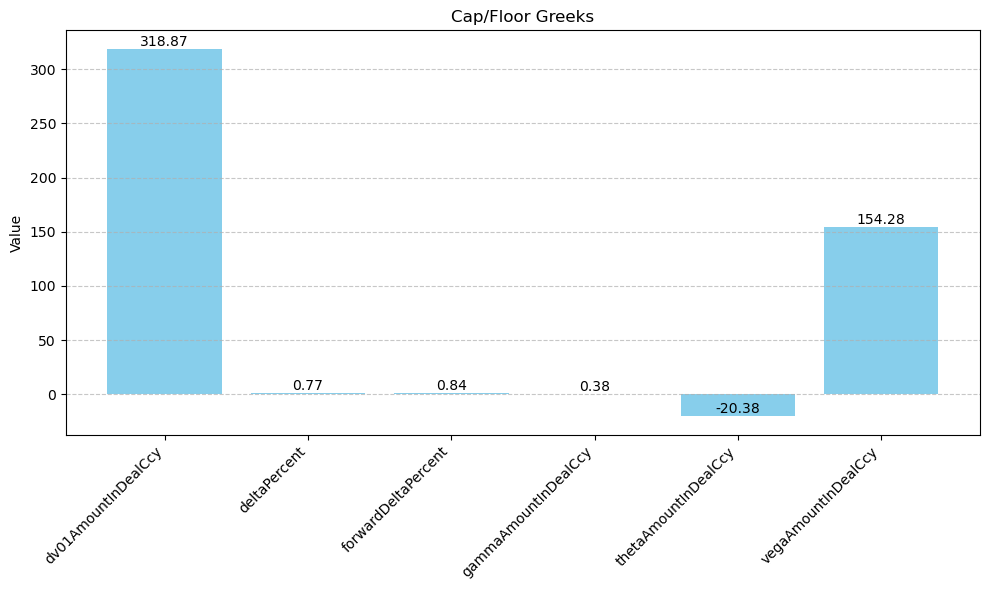

In [7]:
# Create figure with specified size
plt.figure(figsize=(10, 6))

# Create bar plot for each Greek value
bars = plt.bar(df_cap_greeks.index, df_cap_greeks["Value"], color='skyblue', align='center')

# Set chart title and labels
plt.title("Cap/Floor Greeks")
plt.ylabel("Value")

# Set x-axis to show Greek names with rotation for readability
plt.xticks(ticks=df_cap_greeks.index, labels=df_cap_greeks["Greeks"], rotation=45, ha='right')

# Add grid lines for better value reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()
